# **Import Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

# **Plotting Functions**

In [23]:
# Visualise portraits from the dataset
def plot_portraits(images, names, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())


In [24]:
# Visualise portraits from the dataset
def plot_eigen_portraits(images, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())


In [4]:
# Plot a few images
def show_faces_of_n_subject(images, subject_ids, names):
    cols = len(subject_ids) 
    rows = 1
    fig, axarr = plt.subplots(nrows = rows, ncols = cols, figsize = (18,9))
    
    for i in range(len(subject_ids)):
        for j in range(len(y)):
            if(y[j] == subject_ids[i]):           
                axarr[i].imshow(images[j].reshape((h, w)), cmap = "gray")
                axarr[i].set_xticks([])
                axarr[i].set_yticks([])
                #axarr[i].set_title("face id:{}".format(subject_ids[i]))      
                axarr[i].set_title(names[subject_ids[i]])                                    
                break;

# **Load Dataset**

In [5]:
from sklearn.datasets import fetch_lfw_people

# Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=10)
n_samples, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names


In [6]:
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("Size of each image is {}x{}".format(h, w))

Total dataset size:
n_samples: 4324
Size of each image is 62x47


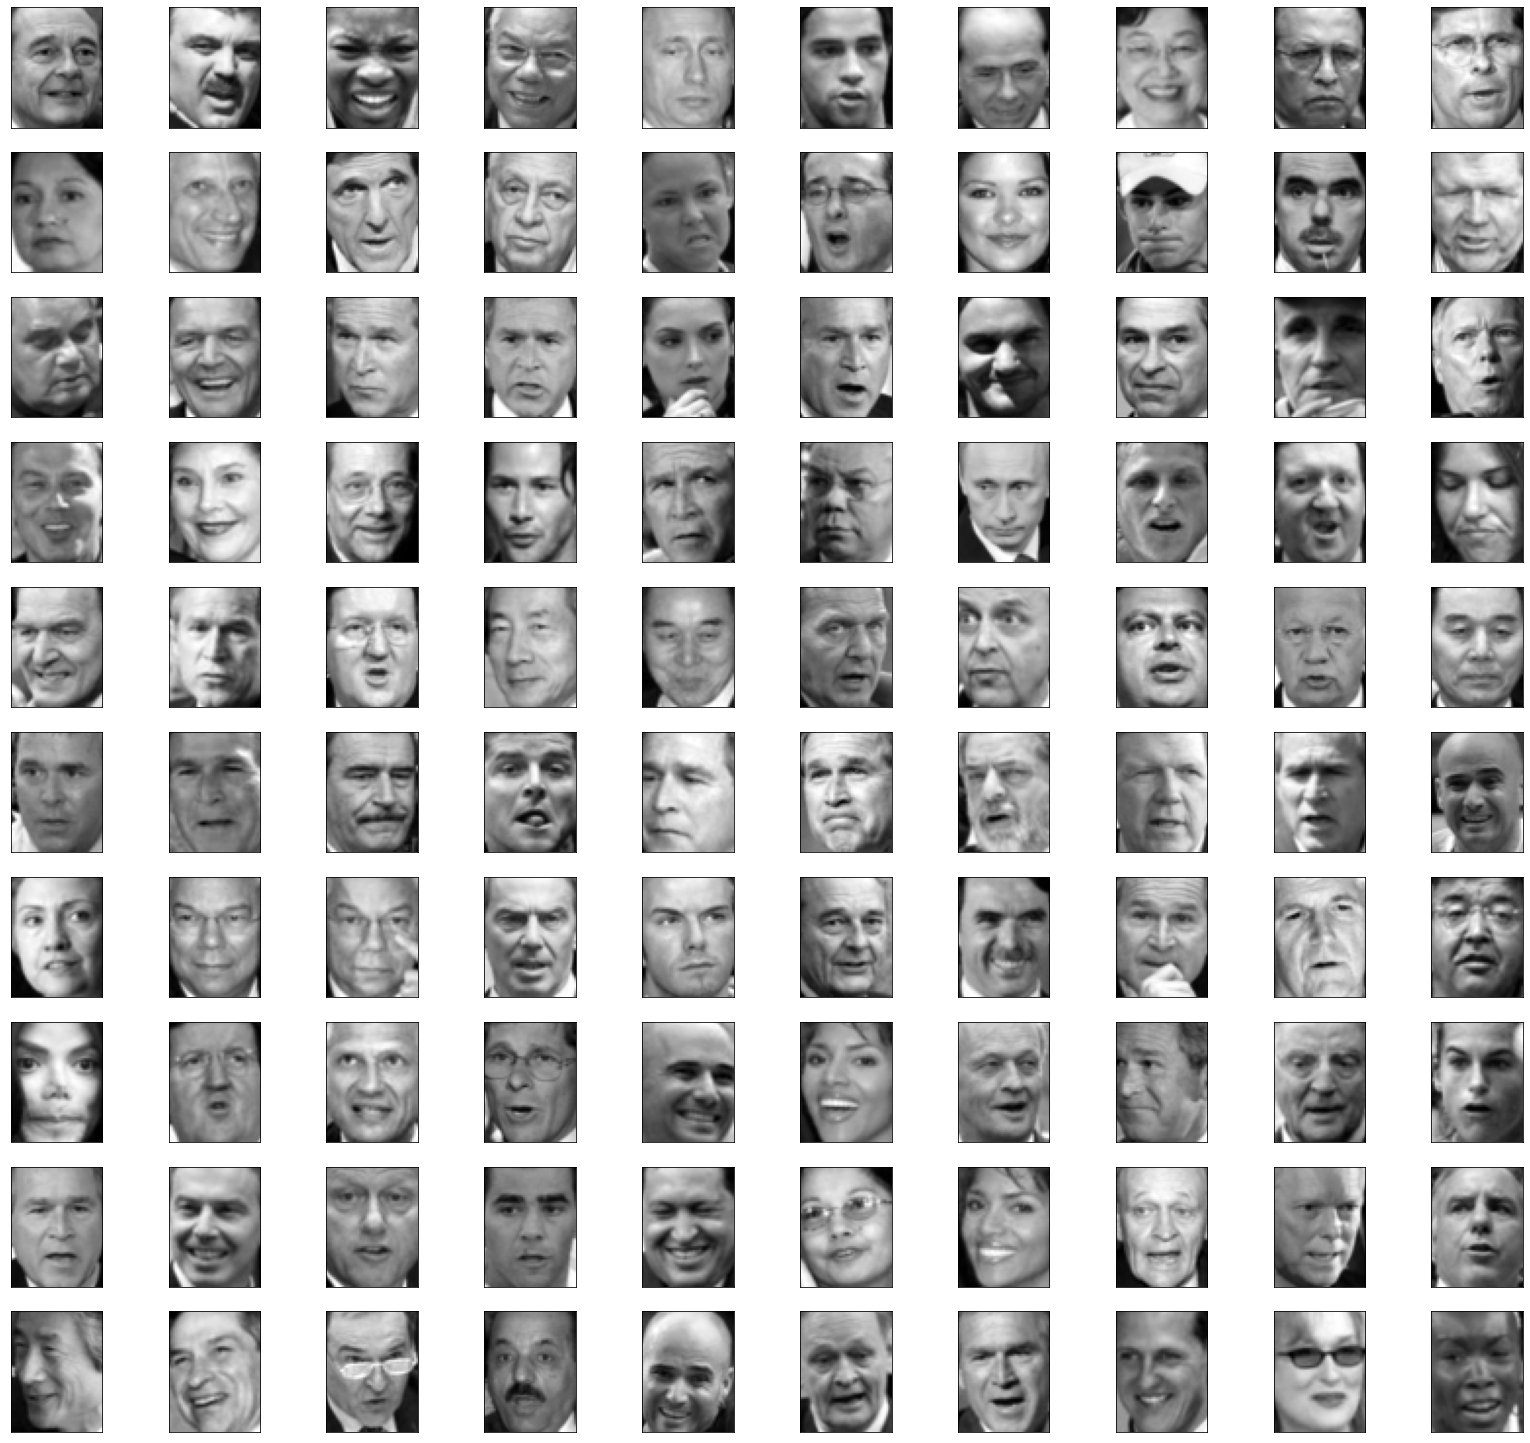

In [26]:
# Plotting few images from dataset
plot_portraits(X, y, h, w, n_row=10, n_col=10)

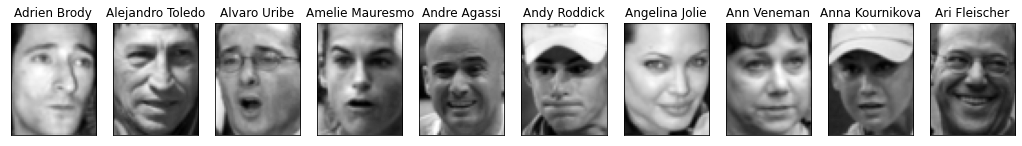

In [8]:
# Show faces of 10 subjects
show_faces_of_n_subject(images = X, subject_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], names = target_names)

# **PCA**

In [9]:
# PCA function
def pca_function(X, n_pc):
    n_samples, n_features = X.shape
    #print(n_samples)
    #print(n_features)

    mean = np.mean(X, axis=0)
    centered_data = X-mean
    U, S, V = np.linalg.svd(centered_data)
    components = V[:n_pc]
    projected = U[:,:n_pc]*S[:n_pc]
    
    return projected, components, mean, centered_data

## **Eigen Faces**

In this case, it can be interesting to visualize the images associated with the first several principal components (These components are technically known as "eigenvectors," so these types of images are often called "eigenfaces")

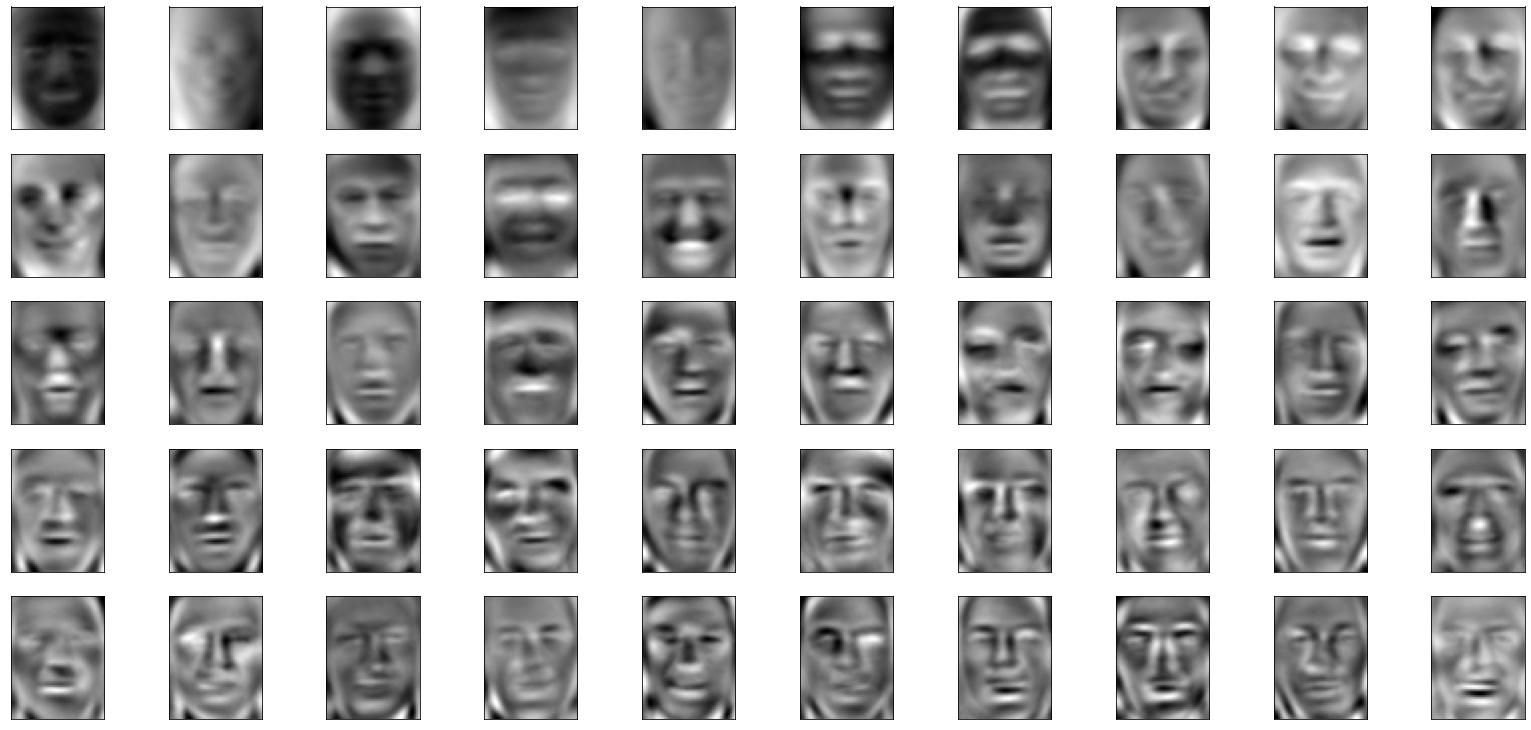

In [28]:
n_components_1 = 50
X_1 = X.reshape(n_samples, h*w)
P_1, C_1, M_1, Y_1= pca_function(X_1, n_pc=n_components_1)
eigen_faces_1 = C_1.reshape((n_components_1, h, w))
plot_eigen_portraits(eigen_faces_1, h, w, 5, 10) 

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips. |

## **Average Face**

Here is our mean face of all faces in the dataset

Text(0.5, 1.0, 'Average Face')

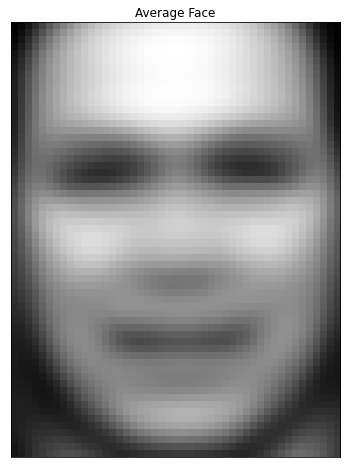

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
ax.imshow(M_1.reshape((62, 47)), cmap = "gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

## **Reconstruct Faces**

In [12]:
def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image


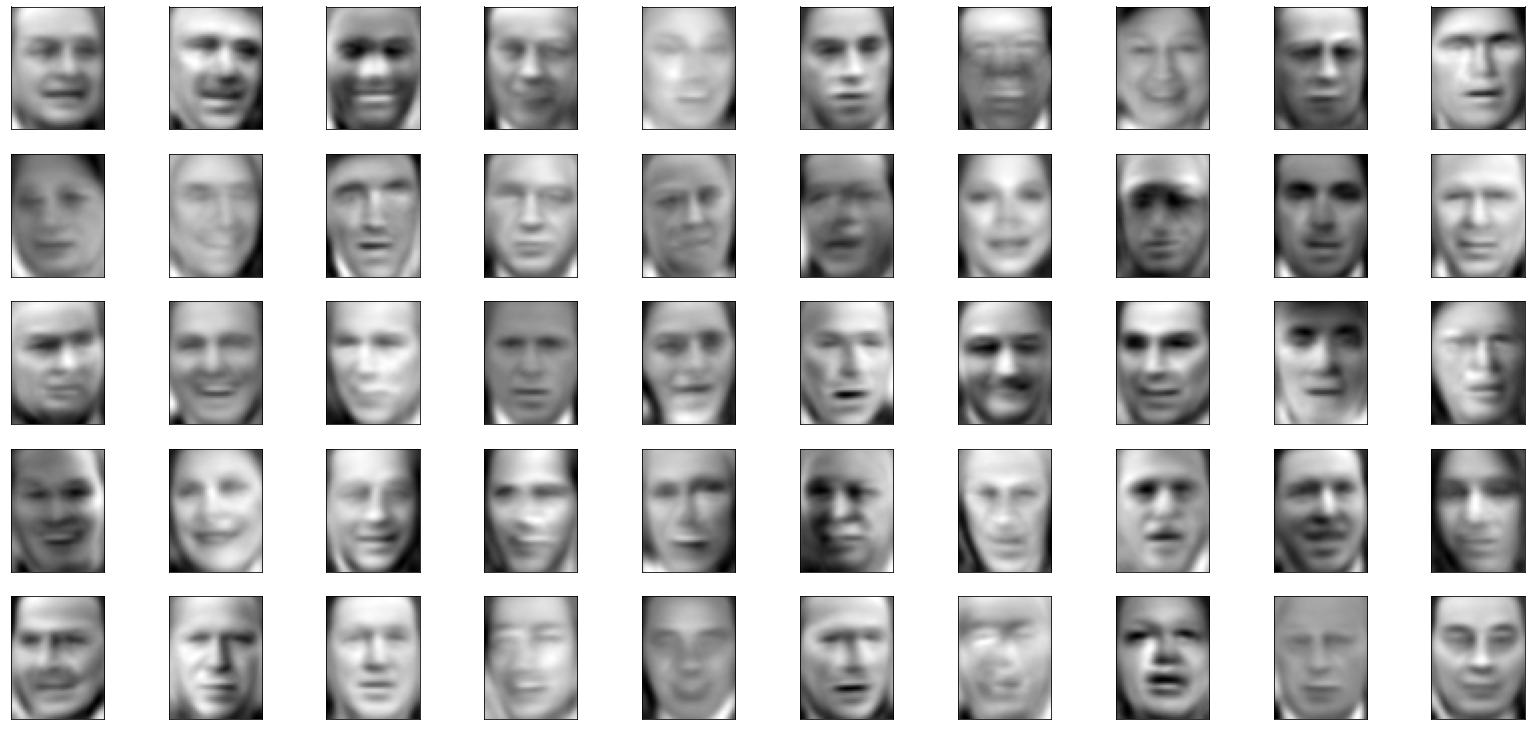

In [29]:
recovered_images=[reconstruction(Y_1, C_1, M_1, h, w, i) for i in range(len(X))]
plot_eigen_portraits(recovered_images, h, w, 5, 10)

### **Using Built-in PCA function**


In [14]:
from sklearn.decomposition import PCA
# Compute a PCA 
n_components_2 = 50
pca = PCA(n_components=n_components_2, whiten=True).fit(X)
# apply PCA transformation
X_pca = pca.transform(X)


In [15]:
# Get number of eigen faces
number_of_eigenfaces = len(pca.components_)

# Get eigen faces
eigen_faces_2 = pca.components_.reshape((number_of_eigenfaces, h, w))

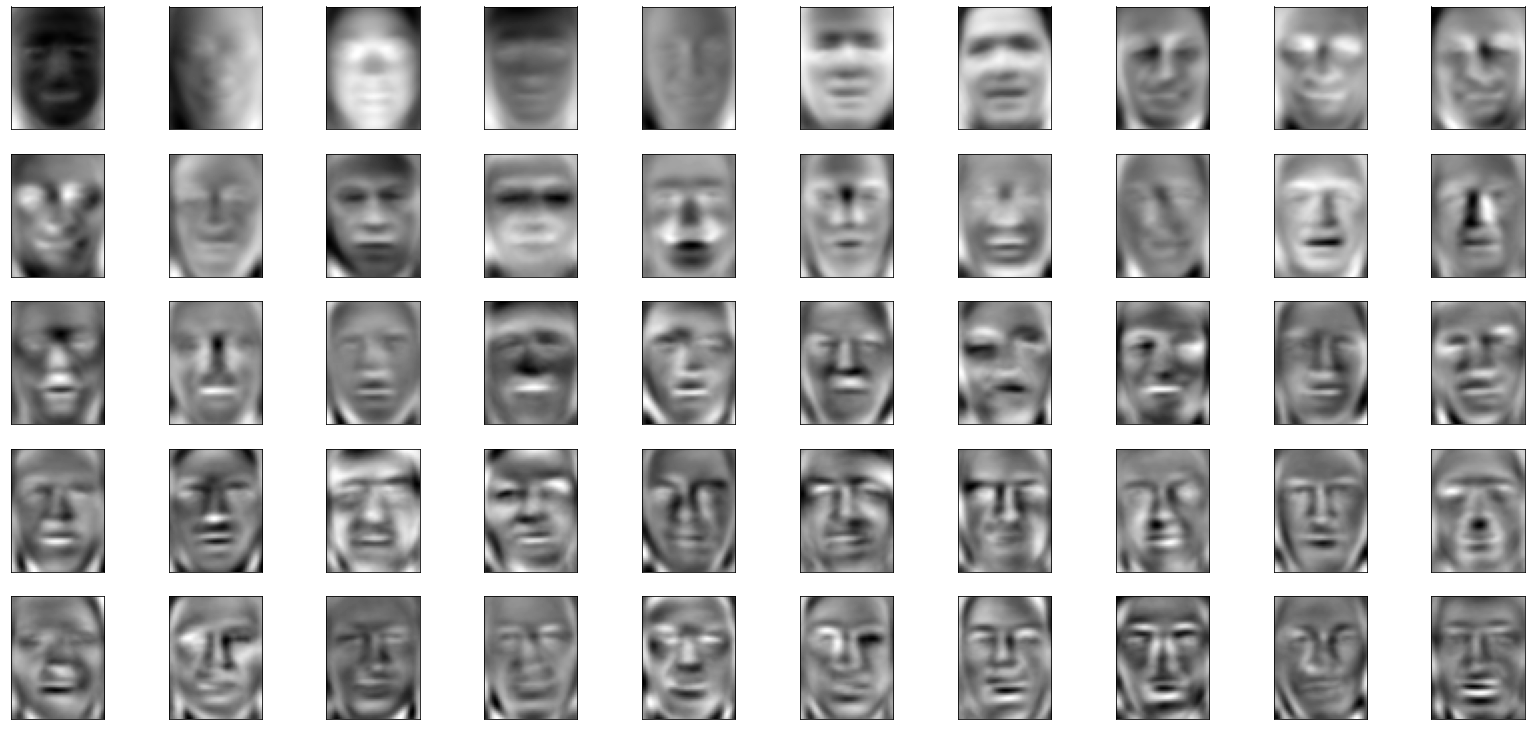

In [30]:
plot_eigen_portraits(eigen_faces_2, h, w, 5, 10) 

**Show Average Face**


Text(0.5, 1.0, 'Average Face')

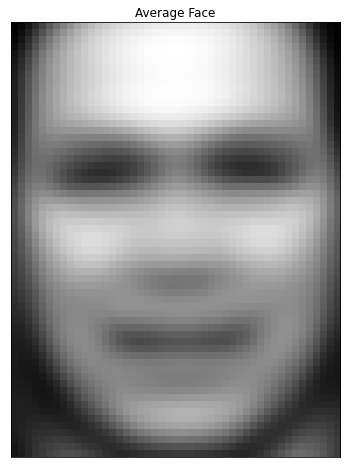

In [18]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
ax.imshow(pca.mean_.reshape((62, 47)), cmap = "gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

## **Choosing the Number of Components**

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

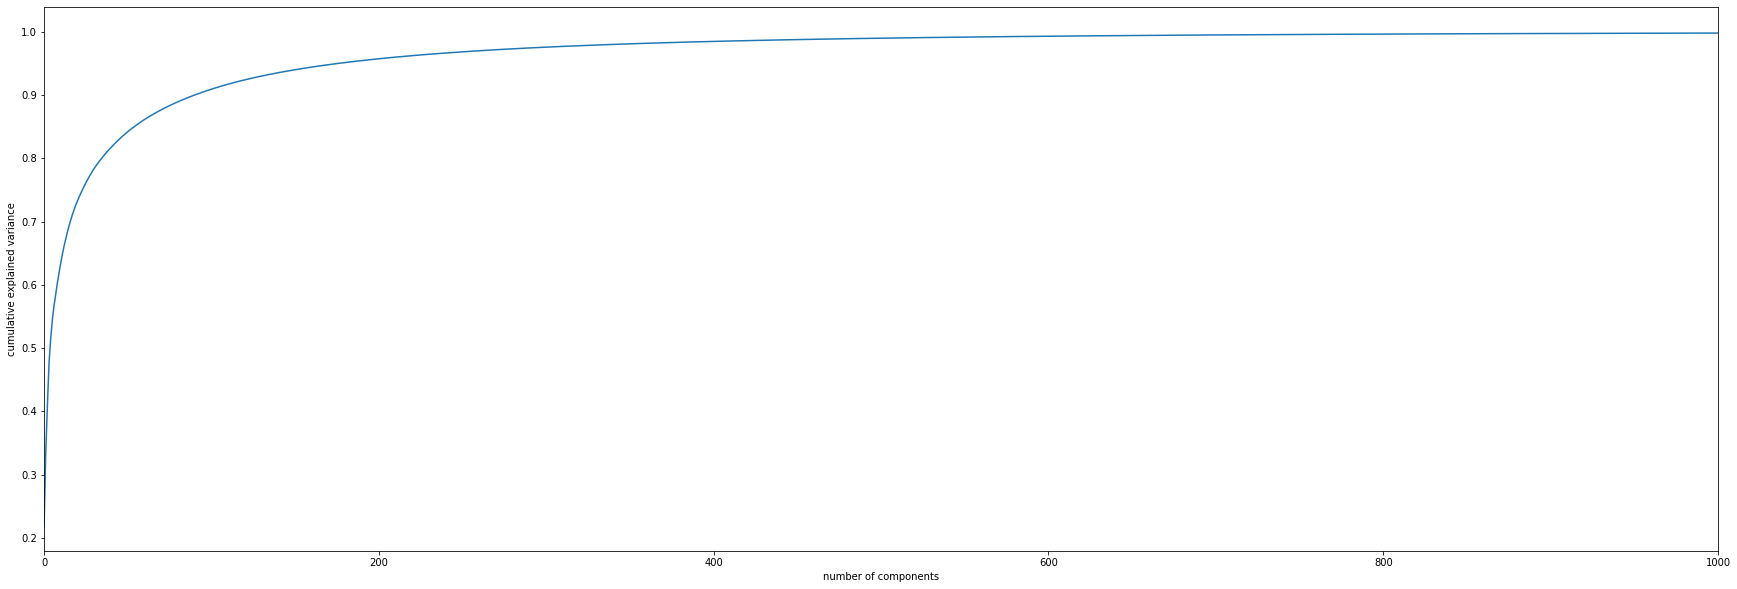

In [19]:
pca_ = PCA().fit(X)
plt.figure(1, figsize = (30, 10))

plt.xlim(0, 1000)

plt.plot(np.cumsum(pca_.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We see that these 300 components account for over 90% of the variance. That would lead us to believe that using these 200 components, we would recover most of the essential characteristics of the data. 

**Eigen Faces**

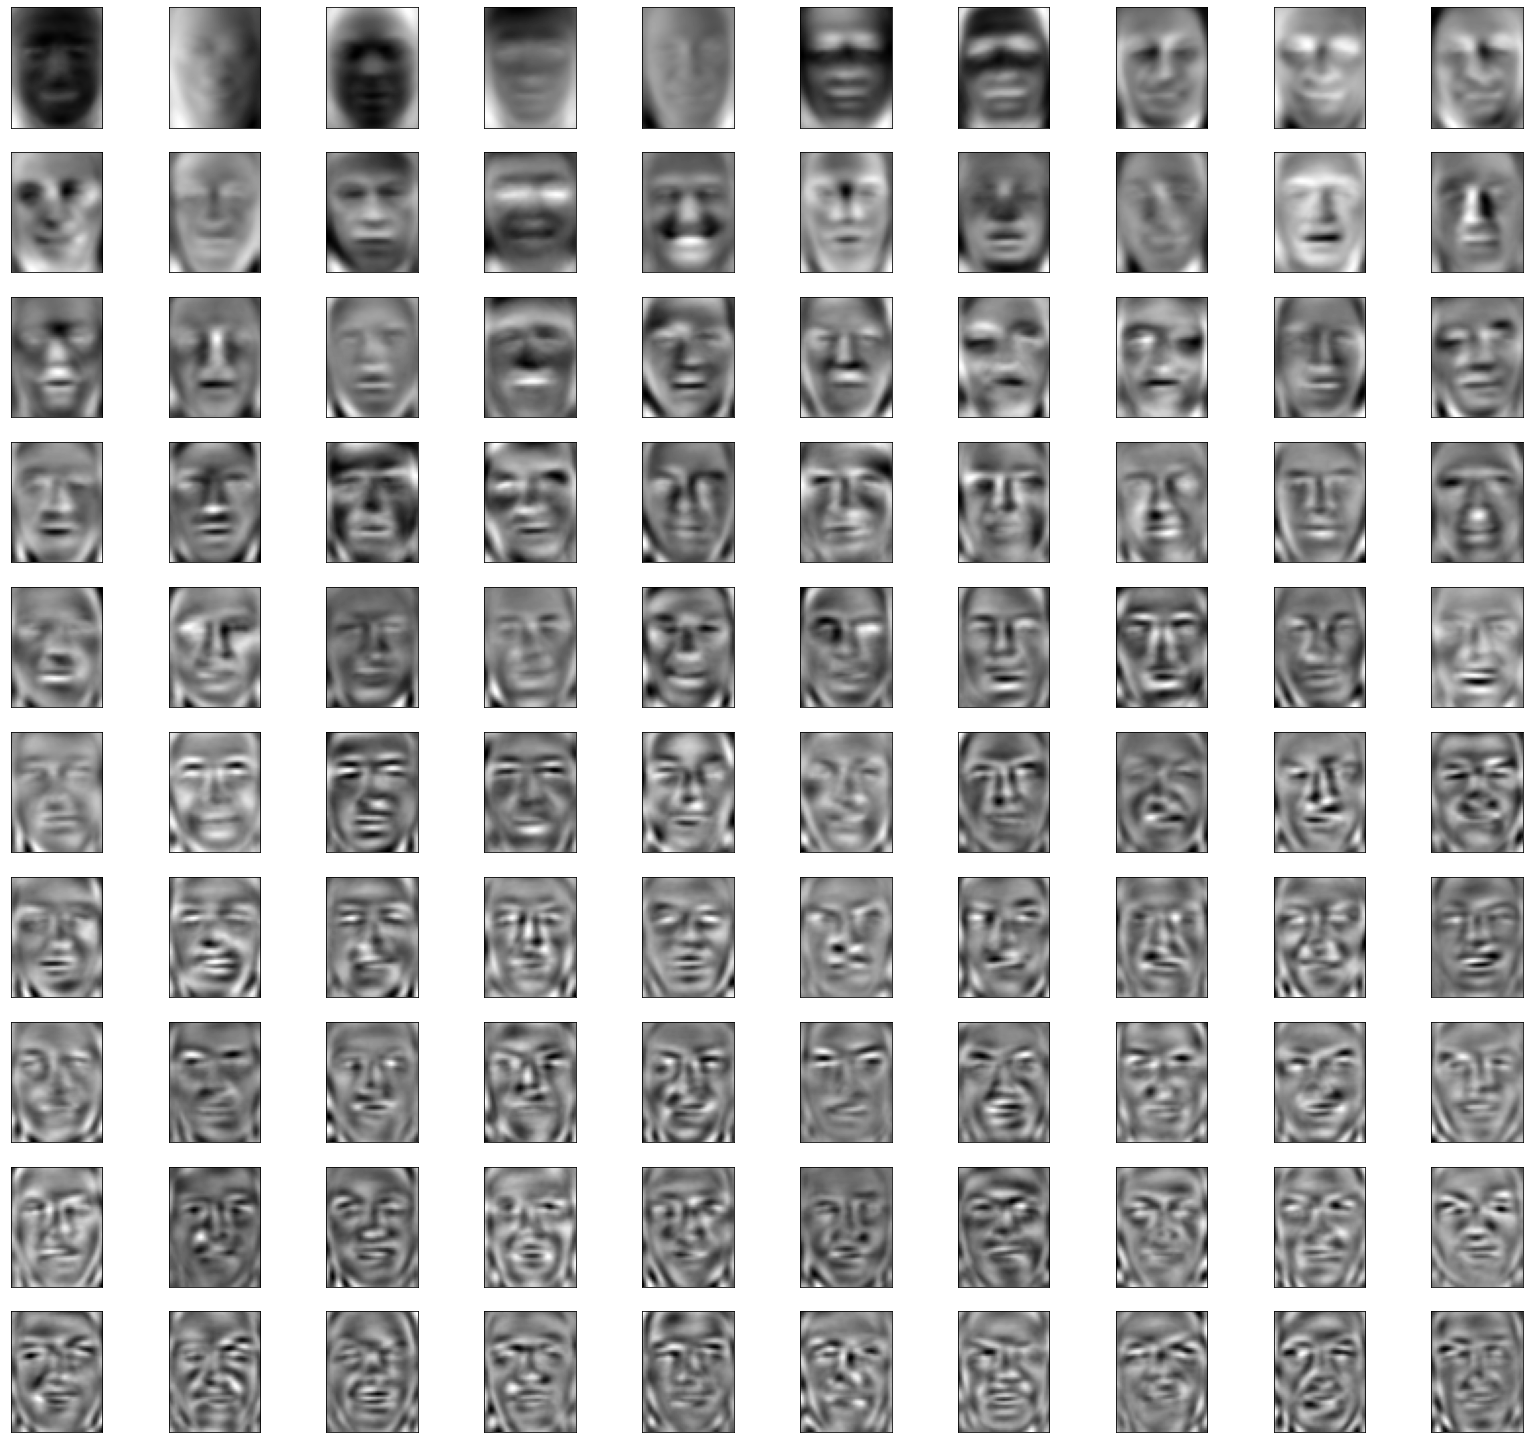

In [31]:
n_components = 300
#X = X.reshape(n_samples, h*w)
P, C, M, Y= pca_function(X, n_pc=n_components)
eigenfaces = C.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

# Plotting first 100 of 300 faces
plot_eigen_portraits(eigenfaces, h, w, 10, 10) 

**Recover Faces**

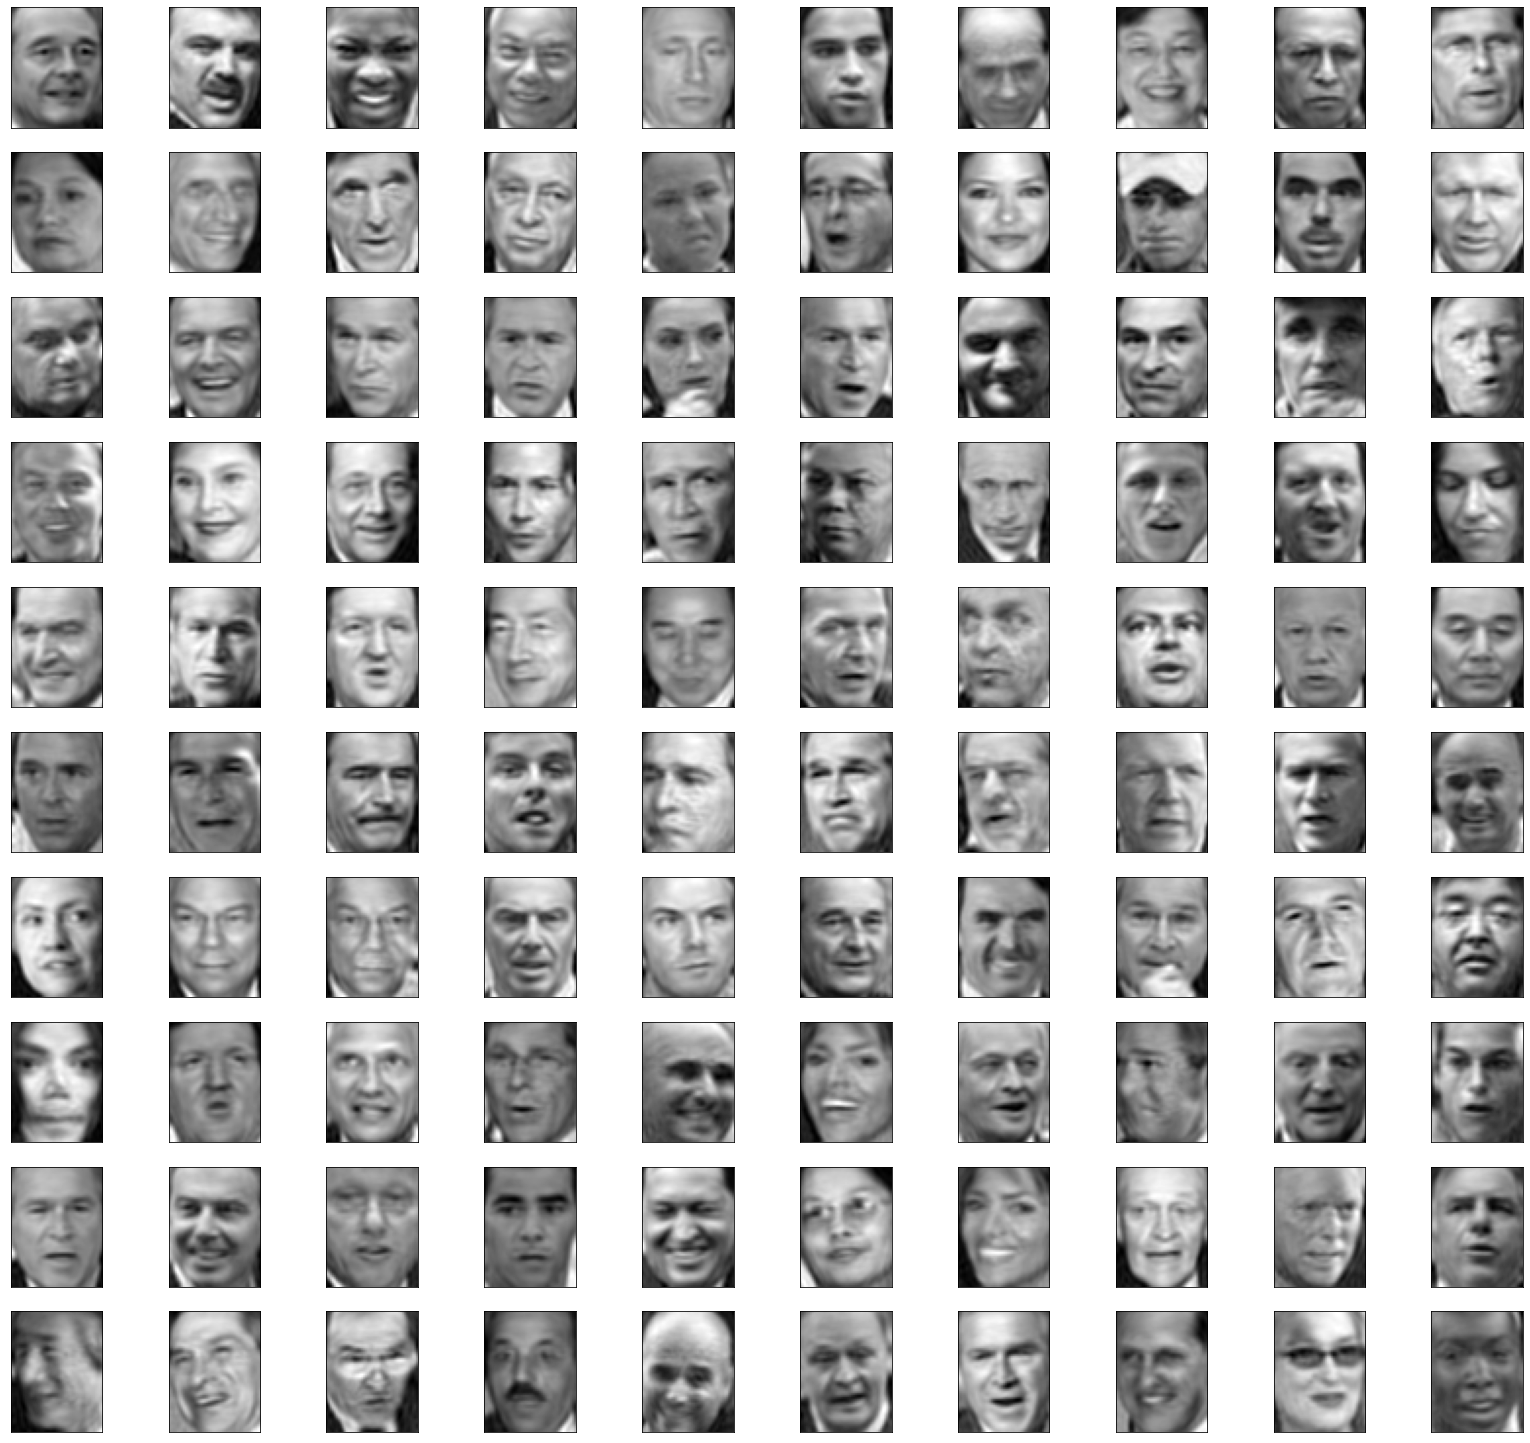

In [32]:
recovered_images=[reconstruction(Y, C, M, h, w, i) for i in range(len(X))]

# Plotting first 100 of 300 faces
plot_eigen_portraits(recovered_images, h, w, 10, 10)

Although the dimensionality of the data was reduced, the projected images contain enough information that we might, by eye, recognize the individuals in the image. 

What this means is that our classification algorithm needs to be trained on 300-dimensional data rather than 3,000-dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification.

Text(0.5, 1.0, 'Average Face')

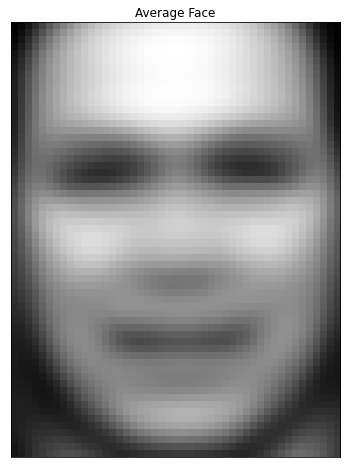

In [22]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
ax.imshow(M.reshape((62, 47)), cmap = "gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')